In [479]:
import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
import yfinance as yf
import numpy as np


from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

### Scarico tutti gli stock

In [468]:
end = dt.date(2021,4,30)
start = dt.date(2020,4,1)

In [469]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# per avere una lista di titoli
tickers = df.Symbol.to_list()

## conto i titoli
print(len(tickers))

df = yf.download(tickers,start=start,end=end)
stocks = df['Adj Close']

505
[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


# Come viene calcolato il pct_change?

$pctChange =\frac{V_{1} - V_{0}}{V_{0}}$

Per calcolarlo il rendimento all'interno di un mese, possiamo prendere il valore dell'azione all'inizio del mese e alla fine sottrarli e dividerli per il valore iniziale.

Oppure seguire questa formula

$pctChangeTotale =\prod_{n=1}^{N}pctChange_n -1 $

* dove N è il numero di pct_change all'interno del mese

In [470]:
stocks_pct = stocks.pct_change() ## vengono trasformati in percentuale 
stocks_pct

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,-0.037699,-0.123052,-0.044471,-0.052617,-0.036357,-0.025650,-0.004685,-0.029654,-0.052554,-0.053513,...,-0.036816,-0.016038,-0.011588,-0.039145,-0.082297,-0.012841,-0.113277,-0.038889,-0.053812,-0.049027
2020-04-02,0.048897,-0.058934,-0.008523,0.016687,0.023291,-0.027137,-0.008306,0.037482,0.010279,0.009130,...,0.040289,0.032077,0.076472,0.004288,0.060733,-0.023651,0.034363,-0.012581,0.002765,0.036723
2020-04-03,-0.025868,-0.066600,-0.042529,-0.014371,-0.023426,-0.030397,-0.013121,0.000126,-0.026365,-0.034051,...,-0.042370,-0.000884,-0.029456,-0.053910,-0.045741,-0.041635,-0.007550,0.022039,-0.027964,-0.012238
2020-04-06,0.055950,0.011715,0.131837,0.087237,0.032166,0.060856,0.062659,0.041284,0.091357,0.086918,...,0.056861,0.070435,0.032135,0.064316,0.077521,0.113744,0.064450,0.077325,0.091167,0.106273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.015982,0.051819,-0.002746,0.018039,0.012085,0.006287,0.022219,-0.001538,0.005445,0.016854,...,-0.000562,0.053461,0.005428,0.013782,0.012835,-0.000849,0.001353,0.020642,0.032534,0.008695
2021-04-26,0.004829,0.044055,-0.013066,0.002978,0.000090,-0.015783,-0.008062,-0.005920,-0.007610,-0.000271,...,-0.006753,0.033164,0.001979,0.001662,-0.000362,-0.017329,-0.010697,0.002191,0.006265,-0.004339
2021-04-27,-0.006262,-0.012704,0.000710,-0.002450,0.000449,-0.007767,-0.021740,-0.007179,0.002521,0.003141,...,-0.008499,-0.002613,0.013111,-0.000754,0.008330,0.006311,0.003585,0.006520,0.009888,-0.000294


In [471]:
# per rimuovere la prima riga 
stocks_pct = stocks_pct[1:]

In [420]:
# stocks_rendimento = stocks.resample('M').agg(lambda x: (x+1).prod()-1) # dà il rendimento mensile

In [422]:
df = stocks_rendimento
normalized_df=(df-df.min())/(df.max()-df.min())

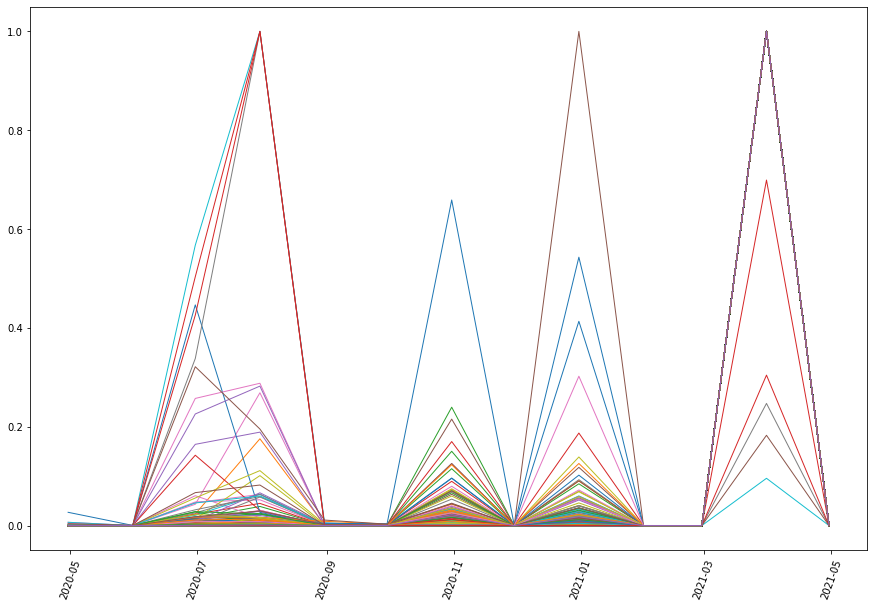

In [432]:
plt.figure(figsize=(15,10))

time = np.array(normalized_df.index)
plt.plot(time,normalized_df, linewidth=1)
# plt.scatter(time,df_price_tweets.loc[:,'high_median'], color='darkblue',linewidth=None,edgecolors=None , marker='o')
# plt.scatter(df_price_tweets.loc[:,'time'],df_price_tweets.loc[:,'high_mean'], color='aqua',linewidth=None,edgecolors=None , marker='x')
#plt.plot(df_price_tweets.loc[:,'date'],df_price_tweets.loc[:,'price_eur_median'], color='aqua',linewidth=3)
plt.xticks(rotation=70)
# plt.legend(('compound_media', 'high_median', 'high_mean'))
plt.show()

### Prendiamo l'indice su cui andrà fatta la regressione

In [473]:
fund = ['SPY']

In [474]:
fundsret = reader.get_data_yahoo(funds,start,end)['Adj Close'].pct_change()
# fundsret = fundsret.resample('M').agg(lambda x: (x+1).prod()-1) # dà il rendimento mensile
df = fundsret
normalized_df_fundsret =(df-df.min())/(df.max()-df.min())
# Adj close valore di chiusura aggiusto
# pct_change valore percentuale rispetto al giorno prima

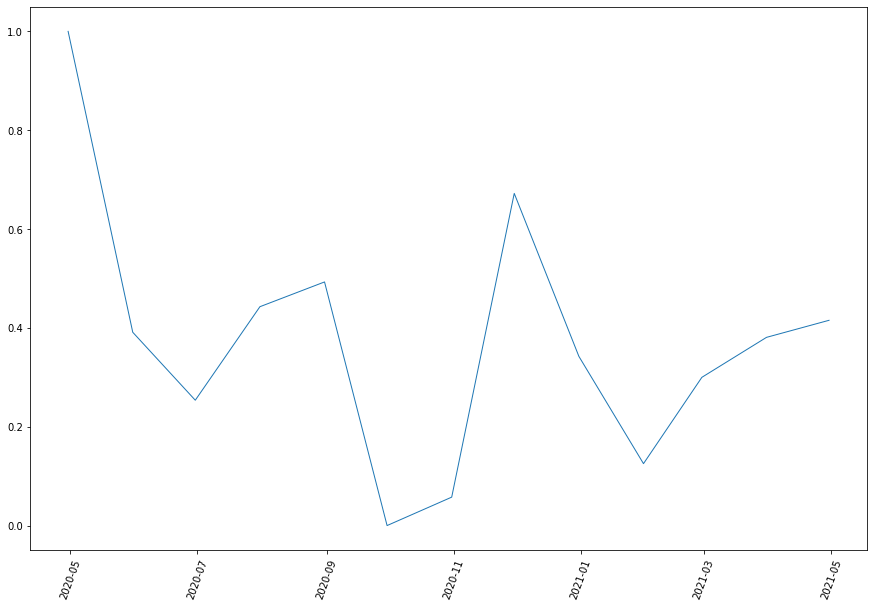

In [434]:
plt.figure(figsize=(15,10))

time = np.array(normalized_df_fundsret.index)
plt.plot(time,normalized_df_fundsret, linewidth=1)
# plt.scatter(time,df_price_tweets.loc[:,'high_median'], color='darkblue',linewidth=None,edgecolors=None , marker='o')
# plt.scatter(df_price_tweets.loc[:,'time'],df_price_tweets.loc[:,'high_mean'], color='aqua',linewidth=None,edgecolors=None , marker='x')
#plt.plot(df_price_tweets.loc[:,'date'],df_price_tweets.loc[:,'price_eur_median'], color='aqua',linewidth=3)
plt.xticks(rotation=70)
# plt.legend(('compound_media', 'high_median', 'high_mean'))
plt.show()

In [442]:
print(normalized_df.columns)
print(normalized_df_fundsret.columns)

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=505)
Index(['SPY'], dtype='object', name='Symbols')


In [449]:
x = np.array(normalized_df.A)
y = np.array(normalized_df_fundsret.SPY)
print(len(x))
print(len(y))

13
13


In [ ]:
fundsret = fundsret[1:]

In [482]:
fundsret.index = stocks_pct.index

In [472]:
stocks_pct

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,-0.037699,-0.123052,-0.044471,-0.052617,-0.036357,-0.025650,-0.004685,-0.029654,-0.052554,-0.053513,...,-0.036816,-0.016038,-0.011588,-0.039145,-0.082297,-0.012841,-0.113277,-0.038889,-0.053812,-0.049027
2020-04-02,0.048897,-0.058934,-0.008523,0.016687,0.023291,-0.027137,-0.008306,0.037482,0.010279,0.009130,...,0.040289,0.032077,0.076472,0.004288,0.060733,-0.023651,0.034363,-0.012581,0.002765,0.036723
2020-04-03,-0.025868,-0.066600,-0.042529,-0.014371,-0.023426,-0.030397,-0.013121,0.000126,-0.026365,-0.034051,...,-0.042370,-0.000884,-0.029456,-0.053910,-0.045741,-0.041635,-0.007550,0.022039,-0.027964,-0.012238
2020-04-06,0.055950,0.011715,0.131837,0.087237,0.032166,0.060856,0.062659,0.041284,0.091357,0.086918,...,0.056861,0.070435,0.032135,0.064316,0.077521,0.113744,0.064450,0.077325,0.091167,0.106273
2020-04-07,-0.004438,0.075790,0.037888,-0.011582,-0.004490,0.010546,0.016771,-0.009670,-0.011623,-0.031962,...,-0.031398,-0.008269,0.019027,0.009541,0.015340,0.012057,0.040535,0.002658,0.041218,-0.005363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.015982,0.051819,-0.002746,0.018039,0.012085,0.006287,0.022219,-0.001538,0.005445,0.016854,...,-0.000562,0.053461,0.005428,0.013782,0.012835,-0.000849,0.001353,0.020642,0.032534,0.008695
2021-04-26,0.004829,0.044055,-0.013066,0.002978,0.000090,-0.015783,-0.008062,-0.005920,-0.007610,-0.000271,...,-0.006753,0.033164,0.001979,0.001662,-0.000362,-0.017329,-0.010697,0.002191,0.006265,-0.004339
2021-04-27,-0.006262,-0.012704,0.000710,-0.002450,0.000449,-0.007767,-0.021740,-0.007179,0.002521,0.003141,...,-0.008499,-0.002613,0.013111,-0.000754,0.008330,0.006311,0.003585,0.006520,0.009888,-0.000294


In [480]:
x = fundsret
y = stocks_pct

In [ ]:
# chi è la varibile indipendete? l'indice è la variabile indipendete. L'azione è dipendete (dal mercato)

In [456]:
model = sm.OLS(y=normalized_df_fundsret.loc[:,'SPY'], x=normalized_df.loc[:,'A'])
# model = sm.ols(formula="A ~ B + C", data=df).fit()

results = model.fit()
results.summary()

TypeError: __init__() missing 1 required positional argument: 'endog'

In [483]:
OLS_model = sm.OLS(y,x).fit()  # training the model
predicted_values = OLS_model.predict()  # predicted values
residual_values = OLS_model.resid # residual values

In [484]:
residual_values

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,-0.034339,-0.125166,-0.045947,-0.047948,-0.031995,-0.022912,-0.001890,-0.023716,-0.044116,-0.046193,...,-0.032415,-0.013000,-0.009481,-0.036468,-0.079741,-0.011124,-0.110270,-0.040728,-0.050956,-0.044042
2020-04-02,0.046792,-0.057609,-0.007598,0.013762,0.020559,-0.028852,-0.010056,0.033763,0.004994,0.004545,...,0.037532,0.030174,0.075152,0.002612,0.059132,-0.024727,0.032480,-0.011429,0.000976,0.033600
2020-04-03,-0.016087,-0.072755,-0.046825,-0.000781,-0.010731,-0.022428,-0.004987,0.017409,-0.001804,-0.012745,...,-0.029560,0.007959,-0.023322,-0.046119,-0.038302,-0.036637,0.001200,0.016686,-0.019651,0.002273
2020-04-06,0.056098,0.011621,0.131772,0.087444,0.032358,0.060977,0.062783,0.041546,0.091730,0.087241,...,0.057056,0.070569,0.032228,0.064434,0.077634,0.113820,0.064582,0.077244,0.091293,0.106494
2020-04-07,0.000451,0.072714,0.035741,-0.004790,0.001855,0.014529,0.020836,-0.001032,0.000652,-0.021314,...,-0.024996,-0.003850,0.022092,0.013435,0.019057,0.014555,0.044908,-0.000017,0.045373,0.001889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,0.016286,0.051627,-0.002879,0.018461,0.012480,0.006534,0.022472,-0.001001,0.006209,0.017517,...,-0.000164,0.053736,0.005619,0.014025,0.013066,-0.000693,0.001625,0.020476,0.032793,0.009146
2021-04-26,0.004797,0.044075,-0.013053,0.002934,0.000049,-0.015809,-0.008088,-0.005975,-0.007688,-0.000340,...,-0.006794,0.033135,0.001960,0.001637,-0.000386,-0.017345,-0.010725,0.002209,0.006238,-0.004386
2021-04-27,-0.006304,-0.012678,0.000729,-0.002508,0.000395,-0.007802,-0.021775,-0.007253,0.002416,0.003050,...,-0.008553,-0.002651,0.013084,-0.000787,0.008298,0.006289,0.003548,0.006542,0.009853,-0.000357


In [128]:
# factors = reader.DataReader('F-F_Research_Data_Factors_weekly','famafrench',start,end)[0]
# factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2020-10-02,1.85,3.05,1.77,0.002
2020-10-09,4.25,2.50,-0.22,0.002
2020-10-16,0.31,0.07,-0.55,0.002
2020-10-23,-0.51,0.70,3.06,0.002
2020-10-30,-5.74,-0.87,-0.02,0.002
2020-11-06,7.69,0.19,-4.98,0.002
2020-11-13,1.95,2.18,7.00,0.002
2020-11-20,0.17,2.52,0.52,0.002
2020-11-27,2.86,1.20,1.29,0.002


In [132]:
fundsret_mlt.index = stocks.index

In [134]:
merge = pd.merge(fundsret_mlt,factors, on='Date')

In [136]:
merge[['Mkt-RF','SMB','HML','RF']] = merge[['Mkt-RF','SMB','HML','RF']]/100

In [463]:
merge['SPY']

Date
2020-10-09    0.038971
2020-10-16    0.001269
2020-10-23   -0.004348
2020-10-30   -0.055642
2020-11-06    0.072334
2020-11-13    0.022675
2020-11-20   -0.007735
2020-11-27    0.023471
2020-12-04    0.016993
2020-12-11   -0.009599
2020-12-18    0.012159
2020-12-24   -0.000488
2020-12-31    0.013225
2021-01-08    0.019739
2021-01-15   -0.014583
2021-01-22    0.019111
2021-01-29   -0.033457
2021-02-05    0.047667
2021-02-12    0.012716
2021-02-19   -0.006647
2021-02-26   -0.024793
2021-03-05    0.008597
2021-03-12    0.027188
2021-03-19   -0.008385
2021-03-26    0.016689
Name: SPY, dtype: float64

In [ ]:
momentum = rendimentoIniziale - rendimentoFinale > 0

In [ ]:
momentumResiduale = residuoFinale(del primo mese) - residuoIniziale > 0

In [ ]:
# prendere il più alto decile 
# media dei valori e confrontare con il grafico dell'indice

In [138]:
merge['SPY-RF'] = merge.SPY-merge.RF

In [141]:
y = merge['SPY']
X =  merge[['Mkt-RF','SMB','HML']]
           
X_sm = sm.add_constant(X)

In [ ]:
# y rendimento dell'azione al variare del tempo () , varibile indipendente
# x rendimento dell'indice al variare del tempo () , residui
model = sm.OLS(y,x)

In [143]:
model = sm.OLS(y,X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1234.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           9.21e-24
Time:                        22:10:42   Log-Likelihood:                 120.69
No. Observations:                  25   AIC:                            -233.4
Df Residuals:                      21   BIC:                            -228.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.76e-05      0.000      0.158      0.876      -0.001       0.001
Mkt-RF         1.0055      0.018     56.436      0.000       0.968       1.043
SMB           -0.2072      0.024     -8.598      0.000      -0.257      -0.157
HML            0.0691      0.016      4.340      0.000       0.036       0.102
==============================================================================
Omnibus:                        2.258   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.101
Skew:                          -0.480   Prob(JB):                        0.577
Kurtosis:                       3.366   Cond. No.                         61.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
results.resid

Date
2020-10-09    1.490716e-03
2020-10-16   -1.401256e-03
2020-10-23    3.977658e-05
2020-10-30    2.077751e-04
2020-11-06   -1.234694e-03
2020-11-13    2.673119e-03
2020-11-20   -4.659880e-03
2020-11-27   -3.768597e-03
2020-12-04    1.442604e-04
2020-12-11    1.575585e-04
2020-12-18    3.339992e-04
2020-12-24    6.547166e-04
2020-12-31    7.000923e-04
2021-01-08   -5.670588e-08
2021-01-15   -1.230407e-03
2021-01-22    3.968386e-03
2021-01-29    8.013452e-04
2021-02-05    2.893593e-04
2021-02-12   -5.884316e-04
2021-02-19   -3.410865e-03
2021-02-26    2.355634e-03
2021-03-05   -7.241886e-04
2021-03-12    1.557646e-03
2021-03-19   -6.094574e-04
2021-03-26    2.253447e-03
dtype: float64

### Codice per il Momentum

In [194]:
past_24 = (mtl_ret+1).rolling(24).apply(np.prod)-1

In [195]:
past_24

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### da rimuovere

In [252]:
formation = dt.datetime(2010,12,31)
formation

datetime.datetime(2010, 12, 31, 0, 0)

In [253]:
end_measurement = formation-MonthEnd(1)

In [254]:
end_measurement

Timestamp('2010-09-30 00:00:00')

In [242]:
MonthEnd(1)

<MonthEnd>

In [304]:
formation = dt.datetime(2021,2,26)
formation

datetime.datetime(2021, 2, 26, 0, 0)

In [305]:
# formation2 = dt.datetime(2021,3,19)

In [306]:
end_measurement = formation - relativedelta(weeks=+1)
end_measurement

datetime.datetime(2021, 2, 19, 0, 0)

In [307]:
ret_25 = mtl_ret.loc[end_measurement]

In [308]:
ret_25

A      -0.008673
AAL     0.081644
AAP     0.086185
AAPL   -0.040629
ABBV    0.005458
          ...   
YUM    -0.003224
ZBH    -0.029186
ZBRA    0.027630
ZION    0.049716
ZTS    -0.040250
Name: 2021-02-19 00:00:00, Length: 505, dtype: float64

In [309]:
ret_25 = ret_25.reset_index()

In [310]:
ret_25['decile'] = pd.qcut(ret_25.iloc[:,1],10,labels=False,duplicates='drop')

In [311]:
ret_25

,index,2021-02-19 00:00:00,decile
0,A,-0.008673,3
1,AAL,0.081644,9
2,AAP,0.086185,9
3,AAPL,-0.040629,0
4,ABBV,0.005458,5
...,...,...,...
500,YUM,-0.003224,4
501,ZBH,-0.029186,1
502,ZBRA,0.027630,7
503,ZION,0.049716,8


In [312]:
winners = ret_25[ret_25.decile == 9]
losers = ret_25[ret_25.decile == 0]

In [313]:
formation + relativedelta(weeks=1)

datetime.datetime(2021, 3, 5, 0, 0)

In [314]:
(formation + relativedelta(weeks=1)).date()

datetime.date(2021, 3, 5)

In [318]:
winnerret = mtl_ret.loc[formation,mtl_ret.columns.isin(winners['index'])]
loserret = mtl_ret.loc[formation,mtl_ret.columns.isin(losers['index'])]

In [322]:
Momentumprofit = winnerret.mean()-loserret.mean()

In [323]:
Momentumprofit

0.05020351884469322